In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque

# Read the CSV file into a DataFrame
df = pd.read_csv('../data/raw/quantitative.csv')

# Display the DataFrame
# print(df_bug)

# Convert the 'timestamp' column from Unix timestamp to date
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

print(df)

              Timestamp Artifact          Type
0   2022-02-08 09:19:15       A1  Patch Update
1   2024-07-08 09:24:44       A1  Patch Update
2   2024-08-06 18:29:35       A1  Patch Update
3   2024-08-21 10:03:18       A1  Patch Update
4   2024-06-11 15:35:49       A1  Patch Update
..                  ...      ...           ...
989 2018-06-15 06:30:20       A5  Major Update
990 2016-03-21 06:37:50       A5  Major Update
991 2016-03-10 02:37:27       A5  Major Update
992 2021-03-26 13:12:46       A5  Major Update
993 2022-02-09 21:57:50       A5  Major Update

[994 rows x 3 columns]


In [71]:
# Create the pivot table with count aggregation function
df_pivot = df.pivot_table(index='Artifact', columns='Type', aggfunc='size', fill_value=0)

# Display the pivot table
df_pivot 

Type,Major Update,Minor Update,Patch Update
Artifact,,,
A1,10,33,341
A2,14,17,61
A3,9,54,68
A4,40,50,88
A5,9,25,175


In [72]:
df_sorted = pd.DataFrame()
freq = deque()

updates = ['Patch Update', 'Minor Update', 'Major Update']

for update in updates:
    df_update = df[df['Type'] == update]
    for i in range(1, 6):
        # Filter the DataFrame to include only rows where the 'Artifact' column is 'A1'
        artifact = 'A' + str(i)
        df_cur = df_update[df_update['Artifact'] == artifact]

        # Sort the filtered DataFrame by the 'Timestamp' column
        df_cur = df_cur.sort_values(by='Timestamp').reset_index().drop(['index'], axis=1)

        # Calculate the frequency in days
        timedelta = df_cur['Timestamp'].iloc[-1] - df_cur['Timestamp'].iloc[0]
        frequency = timedelta.total_seconds() / 86400 / df_cur.shape[0]

        freq.append([frequency, artifact, update])

        # Combine DataFrames 
        df_sorted = pd.concat([df_sorted, df_cur], ignore_index=True)

# Create the df_freq DataFrame
df_freq = pd.DataFrame(freq, columns=['Time (days/release)', 'Artifact', 'Type'])

# Convert the 'Frequency' column to float
df_freq['Time (days/release)'] = df_freq['Time (days/release)'].astype(float)

df_freq['Frequency (releases/quater)'] = 1 / (df_freq['Time (days/release)'] / 91)

# Display the DataFrame
# print(df_freq)
# print(df_sorted)

In [73]:
# Create the pivot table with count aggregation function
df_sorted_pivot = df_sorted.pivot_table(index='Artifact', columns='Type', aggfunc='size', fill_value=0)

# Convert the DataFrame to a LaTeX table
latex_table = df_sorted_pivot.to_latex(index=False)

# Display the LaTeX table
print(latex_table)

# Display the pivot table
df_sorted_pivot 

\begin{tabular}{rrr}
\toprule
Major Update & Minor Update & Patch Update \\
\midrule
10 & 33 & 341 \\
14 & 17 & 61 \\
9 & 54 & 68 \\
40 & 50 & 88 \\
9 & 25 & 175 \\
\bottomrule
\end{tabular}



Type,Major Update,Minor Update,Patch Update
Artifact,,,
A1,10,33,341
A2,14,17,61
A3,9,54,68
A4,40,50,88
A5,9,25,175


In [74]:
# Create the pivot table with count aggregation function
df_freq_pivot = df_freq.pivot_table(index='Artifact', columns='Type', aggfunc='mean', fill_value=0)

# Round the results to 2 decimal places
df_freq_pivot = df_freq_pivot.round(2)

# Display the pivot table
df_freq_pivot 

Frequency (releases/quater)                            \
Type                    Major Update Minor Update Patch Update   
Artifact                                                         
A1                              0.67         1.49        15.33   
A2                              1.00         1.22         4.14   
A3                              1.76         5.77         7.27   
A4                              4.57         5.71         9.85   
A5                              0.26         0.74         5.15   

         Time (days/release)                            
Type            Major Update Minor Update Patch Update  
Artifact                                                
A1                    135.74        61.11         5.94  
A2                     90.84        74.81        22.00  
A3                     51.79        15.76        12.51  
A4                     19.93        15.94         9.23  
A5                    343.76       123.76        17.68

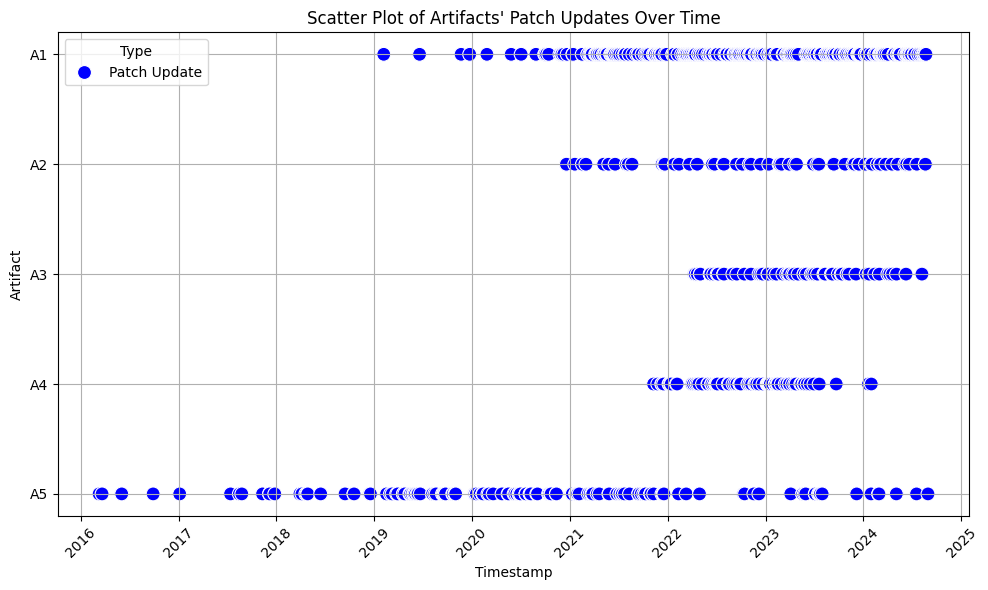

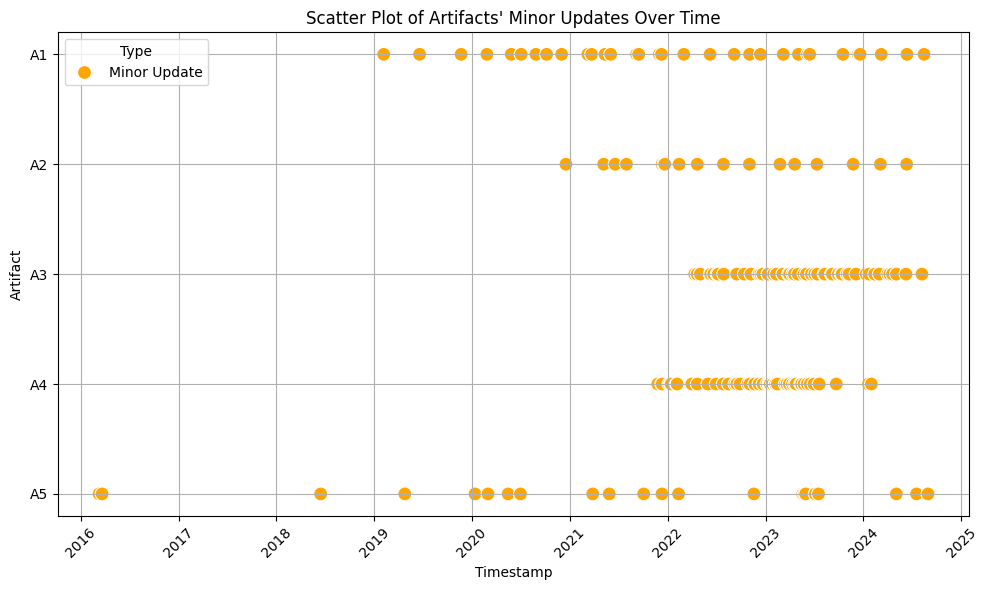

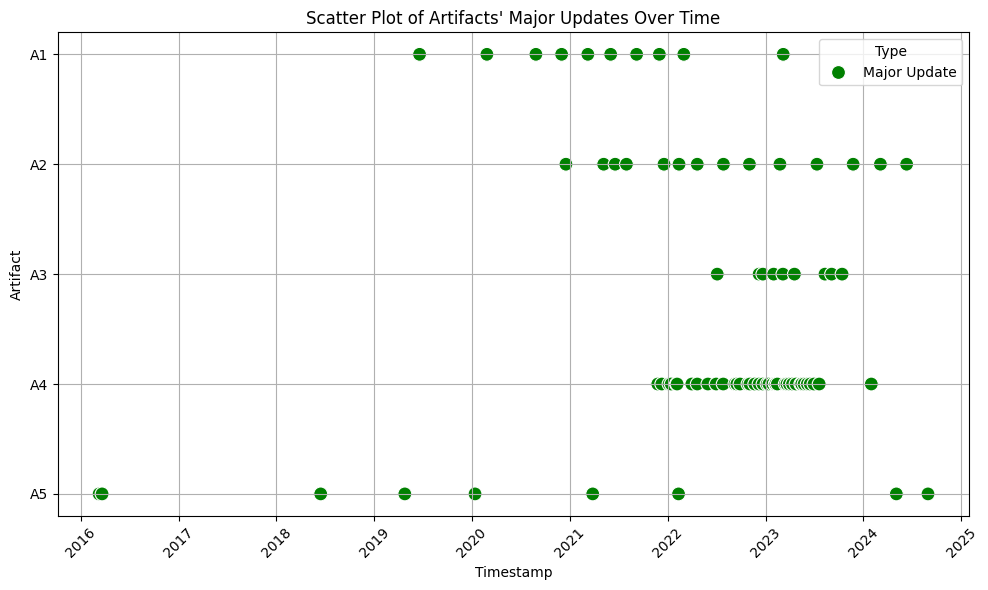

In [75]:
# Assuming df_sorted is already created and contains 'Timestamp', 'Artifact', and 'Type' columns

# Convert the 'Timestamp' column from Unix timestamp to date if not already done
df_sorted['Timestamp'] = pd.to_datetime(df_sorted['Timestamp'], unit='s', errors='coerce')

# Create the scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted[df_sorted['Type'] == 'Patch Update'], x='Timestamp', y='Artifact', hue='Type', palette={'Patch Update': 'blue'}, s=100)
plt.xlabel('Timestamp')
plt.ylabel('Artifact')
plt.title("Scatter Plot of Artifacts' Patch Updates Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('../data/processed/scatter_patch.png')
plt.show()


# Create the scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted[df_sorted['Type'] == 'Minor Update'], x='Timestamp', y='Artifact', hue='Type', palette={'Minor Update': 'orange'}, s=100)
plt.xlabel('Timestamp')
plt.ylabel('Artifact')
plt.title("Scatter Plot of Artifacts' Minor Updates Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('../data/processed/scatter_minor.png')
plt.show()



# Create the scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted[df_sorted['Type'] == 'Major Update'], x='Timestamp', y='Artifact', hue='Type', palette={'Major Update': 'green'}, s=100)
plt.xlabel('Timestamp')
plt.ylabel('Artifact')
plt.title("Scatter Plot of Artifacts' Major Updates Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('../data/processed/scatter_major.png')
plt.show()

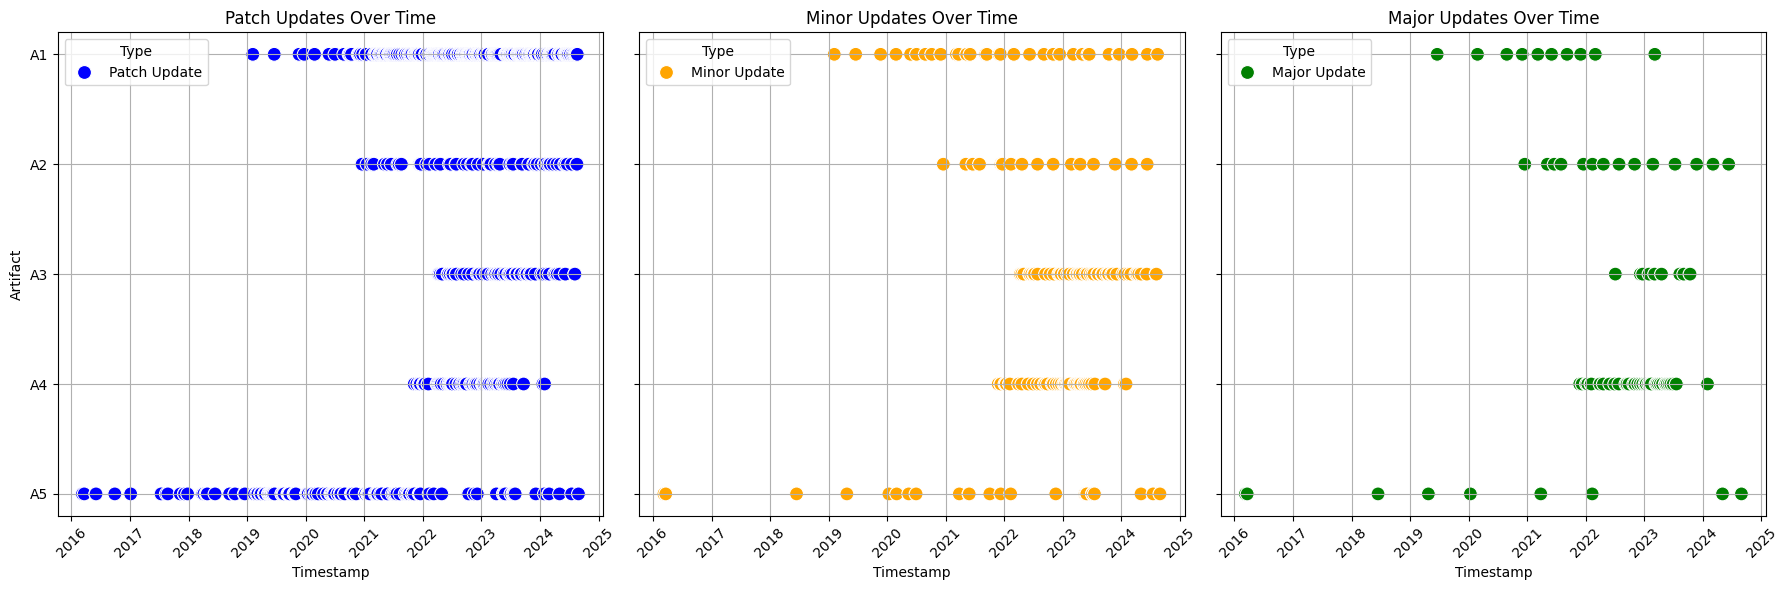

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sorted is already created and contains 'Timestamp', 'Artifact', and 'Type' columns

# Convert the 'Timestamp' column from Unix timestamp to date if not already done
df_sorted['Timestamp'] = pd.to_datetime(df_sorted['Timestamp'], unit='s', errors='coerce')

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Create the scatter plot for 'Patch Update'
sns.scatterplot(data=df_sorted[df_sorted['Type'] == 'Patch Update'], x='Timestamp', y='Artifact', hue='Type', palette={'Patch Update': 'blue'}, s=100, ax=axes[0])
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Artifact')
axes[0].set_title("Patch Updates Over Time")
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Create the scatter plot for 'Minor Update'
sns.scatterplot(data=df_sorted[df_sorted['Type'] == 'Minor Update'], x='Timestamp', y='Artifact', hue='Type', palette={'Minor Update': 'orange'}, s=100, ax=axes[1])
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('')
axes[1].set_title("Minor Updates Over Time")
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Create the scatter plot for 'Major Update'
sns.scatterplot(data=df_sorted[df_sorted['Type'] == 'Major Update'], x='Timestamp', y='Artifact', hue='Type', palette={'Major Update': 'green'}, s=100, ax=axes[2])
axes[2].set_xlabel('Timestamp')
axes[2].set_ylabel('')
axes[2].set_title("Major Updates Over Time")
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('../data/processed/scatter_plots.png')

plt.show()

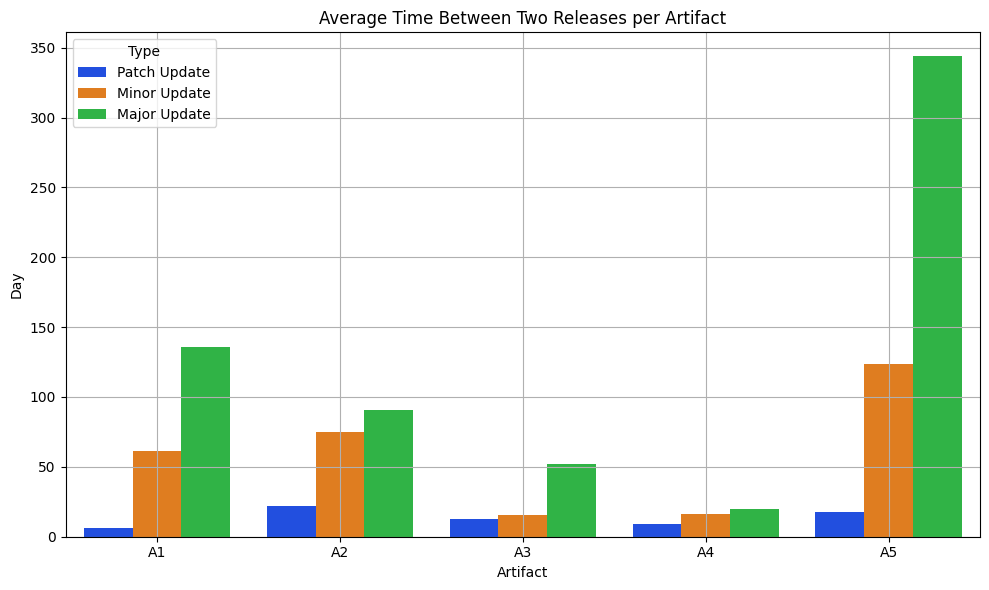

In [77]:
# Plot the DataFrame with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=df_freq, x='Artifact', y='Time (days/release)', hue='Type', palette='bright')
plt.xlabel('Artifact')
plt.ylabel('Day')
plt.title('Average Time Between Two Releases per Artifact')
plt.grid(True)
plt.tight_layout()
plt.savefig('../data/processed/bar_time.png')
plt.show()

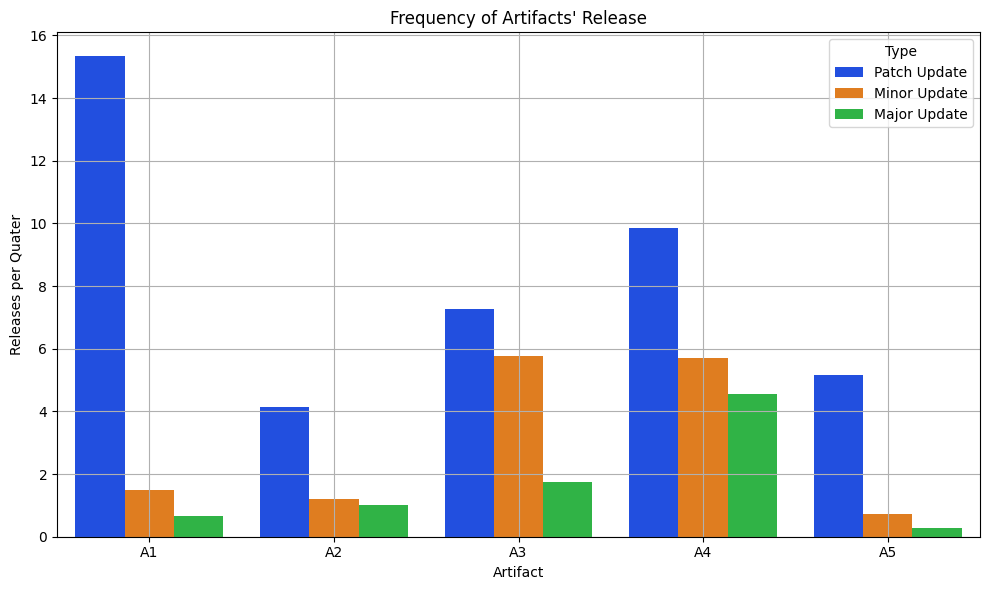

In [78]:
# Plot the DataFrame with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=df_freq, x='Artifact', y='Frequency (releases/quater)', hue='Type', palette='bright')
plt.xlabel('Artifact')
plt.ylabel('Releases per Quater')
plt.title("Frequency of Artifacts' Release")
plt.grid(True)
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('../data/processed/bar_frequency.png')
plt.show()

In [79]:
# Read the CSV file into a DataFrame
df_qualitative = pd.read_csv('../data/raw/qualitative.csv')

# Display the DataFrame
print(df_qualitative)

          Find Update Unexpected Updates Accept BugFixes Accept Big Update  \
0          > 3 months                Yes              No                No   
1          > 3 months                Yes              No                No   
2          > 3 months                Yes             Yes                No   
3          > 3 months                Yes             Yes               Yes   
4             Monthly                Yes              No               Yes   
5          > 3 months                Yes              No               Yes   
6          > 3 months                Yes              No               Yes   
7             Monthly                Yes              No               Yes   
8  Once every 2 weeks                Yes             Yes               Yes   

                     Why postpone important updates? Breaking Changes  \
0  I don't need new features from the new updates...          Monthly   
1  I don't feel the need and sometimes I might pr...       > 3 months   


In [80]:
# Filter the DataFrame to include only rows where the 'Category' column is 'Find Update'
df_find_update = pd.DataFrame(df_qualitative['Find Update'])

df_find_update.columns = ['Find Update']

# Display the new DataFrame
df_find_update

,Find Update
0,> 3 months
1,> 3 months
2,> 3 months
3,> 3 months
4,Monthly
5,> 3 months
6,> 3 months
7,Monthly
8,Once every 2 weeks


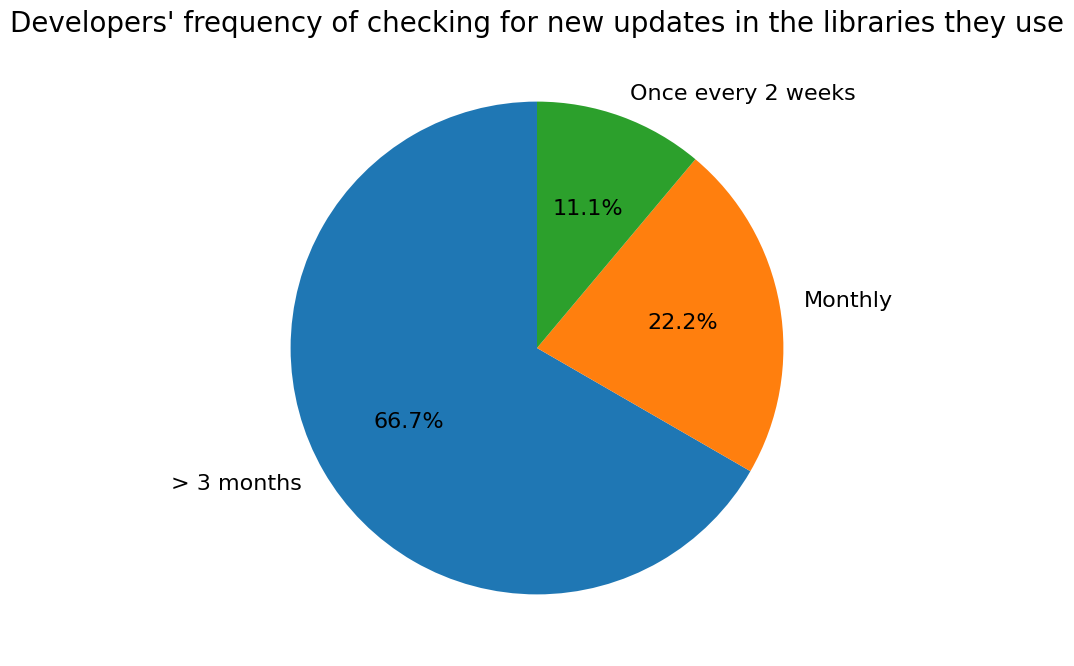

In [81]:
# Pivot the DataFrame with count aggregation function
df_find_update_pivot = df_find_update.pivot_table(index='Find Update', columns='Find Update', aggfunc='size', fill_value=0)

# Flatten the pivot table to create a series for the pie chart
df_find_update_counts = df_find_update_pivot.sum(axis=0)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_find_update_counts, labels=df_find_update_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
plt.title("Developers' frequency of checking for new updates in the libraries they use", fontsize=20)
plt.savefig('../data/processed/pie_check_update.png')
plt.show()

In [82]:
# Filter the DataFrame to include only rows where the 'Category' column is 'Find Update'
df_break = pd.DataFrame(df_qualitative['Breaking Changes'])

df_break.columns = ['Breaking Changes']

# Display the new DataFrame
df_break

,Breaking Changes
0,Monthly
1,> 3 months
2,Monthly
3,> 3 months
4,> 3 months
5,> 3 months
6,> 3 months
7,> 3 months
8,> 3 months


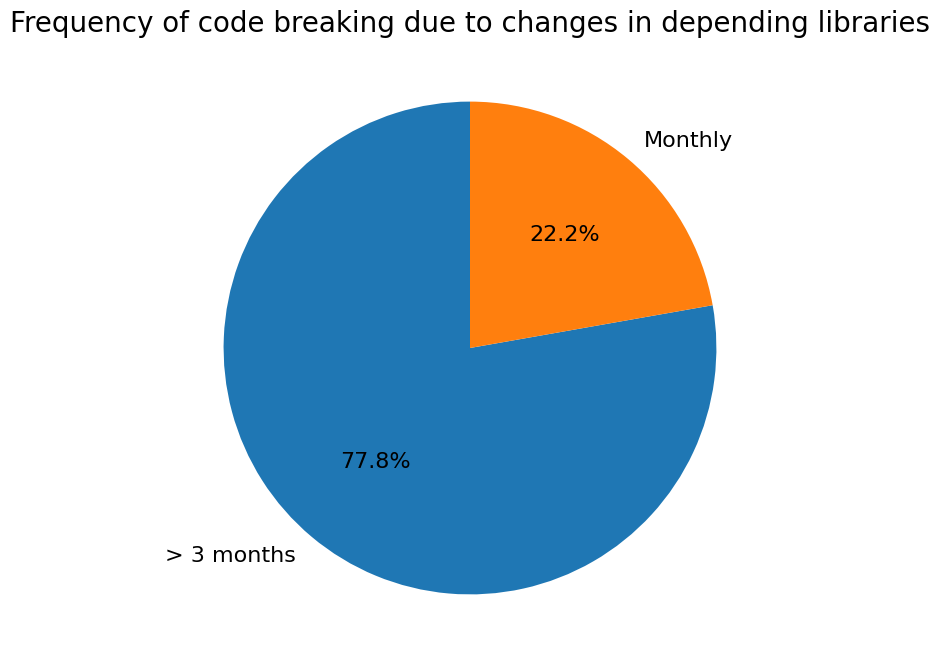

In [83]:
# Pivot the DataFrame with count aggregation function
df_break_pivot = df_break.pivot_table(index='Breaking Changes', columns='Breaking Changes', aggfunc='size', fill_value=0)

# Flatten the pivot table to create a series for the pie chart
df_break_counts = df_break_pivot.sum(axis=0)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_break_counts, labels=df_break_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
plt.title("Frequency of code breaking due to changes in depending libraries", fontsize=20)
plt.savefig('../data/processed/pie_break.png')
plt.show()

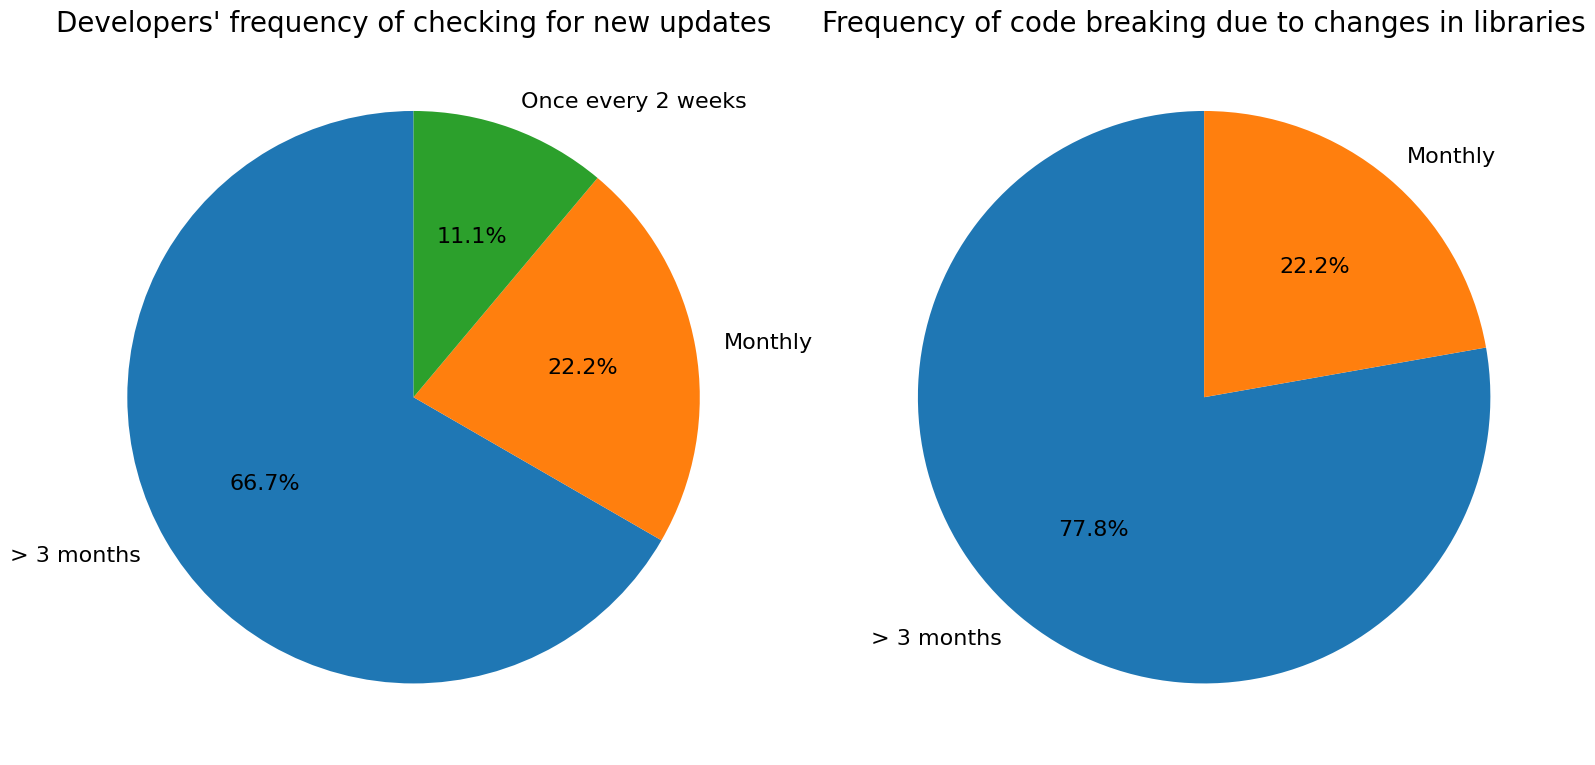

In [84]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first pie chart
axes[0].pie(df_find_update_counts, labels=df_find_update_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
axes[0].set_title("Developers' frequency of checking for new updates", fontsize=20)

# Plot the second pie chart
axes[1].pie(df_break_counts, labels=df_break_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
axes[1].set_title("Frequency of code breaking due to changes in libraries", fontsize=20)

# Adjust layout
plt.tight_layout()
plt.savefig('../data/processed/pie_chart.png')
plt.show()